In [39]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go

In [40]:
# reading our dataset
Main_data=pd.read_csv("merged_data.csv")
Main_data.head()

del Main_data["Unnamed: 0"]
del Main_data["Number of Bedroom"]
Main_data.head()

,Suburb,Address,Rooms,Type,Price,Method,Real Estate Agent,Date,Distance,Postcode,...,Regionname,Propertycount,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size
0,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
1,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
2,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
3,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9
4,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067,...,Northern Metropolitan,4019,33,2167,1354,424,3024,1.0,2196,1.9


In [41]:
#check the type of "Date" and change the format to YYYY-mm-dd and the extract YEAR and Month from the Date and save
#into another column name "Year" and "Month"
Main_data["Date"].dtype

dtype('O')

In [43]:
Main_data['Date'] = pd.to_datetime(Main_data['Date'], format='%d/%m/%Y')

In [44]:
Main_data['Year'] = Main_data['Date'].dt.year
Main_data['Month']=Main_data['Date'].dt.month

In [45]:
#Check to make sure we see new column "Year" 
Main_data.head()

,Suburb,Address,Rooms,Type,Price,Method,Real Estate Agent,Date,Distance,Postcode,...,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,Year,Month
0,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2.5,3067,...,33,2167,1354,424,3024,1.0,2196,1.9,2016,2
1,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,2.5,3067,...,33,2167,1354,424,3024,1.0,2196,1.9,2017,3
2,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-06-04,2.5,3067,...,33,2167,1354,424,3024,1.0,2196,1.9,2016,6
3,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,2016-05-07,2.5,3067,...,33,2167,1354,424,3024,1.0,2196,1.9,2016,5
4,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,2016-10-08,2.5,3067,...,33,2167,1354,424,3024,1.0,2196,1.9,2016,10


In [236]:
map_suburb = Main_data.groupby(['Suburb','Regionname'],as_index=False)['Lattitude','Longtitude','Price'].median()
map_suburb

fig = px.scatter_mapbox(map_suburb,
                        lat="Lattitude",
                        lon="Longtitude",
                        color='Price',
                        mapbox_style='open-street-map',
                        hover_name='Suburb',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size='Price',
                        center={"lat": -37.8136, "lon": 144.9631},
                        zoom=12,
                        hover_data=['Regionname','Suburb','Price'],
                       title='Average Price in different suburbs and regions')
fig.update_geos(fitbounds="locations", visible=True)
fig.update_geos(projection_type="orthographic")
fig.update_layout(template='plotly_dark',margin=dict(l=20,r=20,t=40,b=20))
fig.show()

/Users/asalvalisoltani/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [47]:
Main_data["Regionname"].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Northern Victoria',
       'Eastern Victoria', 'Western Victoria'], dtype=object)

In [48]:
# sort the dataset based on price from highest to lowest
high_to_low_price=Main_data.sort_values("Price" , ascending=False)
high_to_low_price.index.name = None
high_to_low_price.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Real Estate Agent,Date,Distance,Postcode,...,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,Year,Month
8650,Mulgrave,35 Bevis St,3,h,9000000,PI,Hall,2017-07-29,18.8,3170,...,40,2167,746,430,2134,0.8,1913,2.8,2017,7
1782,Canterbury,49 Mangarra Rd,5,h,8000000,VB,Sotheby's,2017-05-13,9.0,3126,...,46,3500,1101,515,3591,0.8,2875,2.7,2017,5
3619,Hawthorn,49 Lisson Gr,4,h,7650000,S,Abercromby's,2017-06-17,5.3,3122,...,34,2259,1207,400,3279,0.9,2145,2.1,2017,6
4001,Kew,15 Barry St,6,h,6500000,S,Jellis,2016-08-13,5.6,3101,...,41,3000,1120,476,3301,0.8,2497,2.5,2016,8
193,Middle Park,136 Page St,5,h,6400000,S,Marshall,2017-09-09,3.0,3206,...,46,3467,1372,600,3853,0.9,2659,2.3,2017,9


Things to consider:
•	Only consider properties between 800k to 1 million dollars.
•	Only consider free standing homes, i.e., no apartments or townhouses.
•	Compare top 5 suburbs in the northern, eastern, western, and southern regions of Melbourne in terms of:
Sale price
Distance to cbd
Distance to major shopping centres
Distance to public transport
Proximity to schools 
•	Correlation between lifestyle choice and which location people choose to live, i.e., singles and young couple’s vs families
•	Correlation between disposable income and people’s willingness to take on debt.


In [50]:
#Only consider properties between 800k to 1 million dollars.
mid_price=Main_data.loc[(Main_data["Price"] >= 800000) & (Main_data["Price"] <= 1000000)]


In [16]:
mid_price_h=mid_price.loc[mid_price["Type"] == "h"]

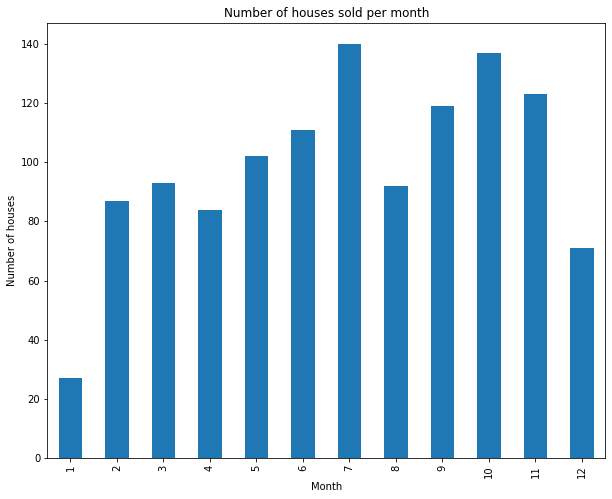

In [250]:
#ploting number of houses sold per month
sold_per_month=mid_price_h.groupby("Month")["Address"].count()
sold_per_month_chart=sold_per_month.plot(kind="bar" , figsize=(10,8))
sold_per_month_chart.set_title("Number of houses sold per month")
sold_per_month_chart.set_xlabel("Month")
sold_per_month_chart.set_ylabel("Number of houses")
plt.savefig("sale_per_month.png" , dpi=80)
plt.show()

In [ ]:
#Compare northern, eastern, western, and southern regions of Melbourne in terms of Sale price
#Top highest price in Northern
#4 bedrooms houses
#from CBD less than 10K

In [192]:
#Northern Suburb
northern=mid_price_h.loc[(mid_price_h['Regionname']== 'Northern Metropolitan') & 
                         (mid_price_h['Rooms'] == 4) &
                         (mid_price_h["Number of Bathroom"] == 2) &
                         (mid_price_h['Distance'] <= 10),:]


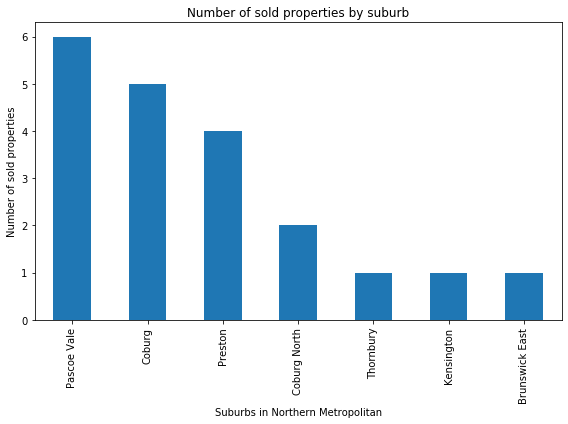

In [251]:
#plotting number of properties by suburb
Bar_plot_data=northern.groupby("Suburb")["Address"].count()
bar_plot_data=Bar_plot_data.sort_values(ascending=False)
bar_chart=bar_plot_data.plot(kind="bar" , figsize=(8,6))
bar_chart.set_ylabel("Number of sold properties")
bar_chart.set_title("Number of sold properties by suburb")
bar_chart.set_xlabel("Suburbs in Northern Metropolitan")
plt.tight_layout()
plt.savefig("Northern.png" , dpi=80)
plt.show()


In [194]:
#Western suburbs
southern=mid_price_h.loc[(mid_price_h['Regionname']== 'Southern Metropolitan') & 
                         (mid_price_h['Rooms'] == 4) &
                         (mid_price_h["Number of Bathroom"] == 2) &
                         (mid_price_h['Distance'] <= 10),:]



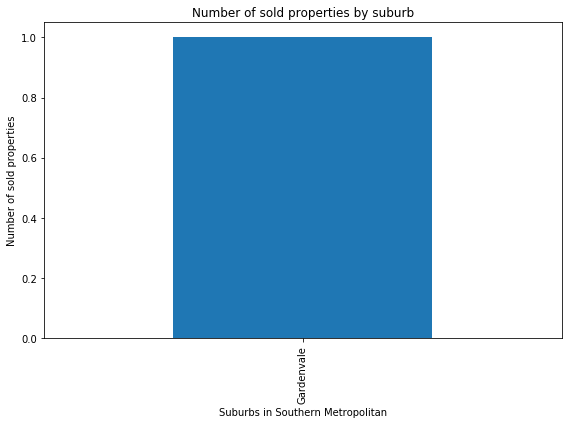

In [252]:
#plotting number of properties by suburb
Bar_plot_data=southern.groupby("Suburb")["Address"].count()
bar_plot_data=Bar_plot_data.sort_values(ascending=False)
bar_chart=bar_plot_data.plot(kind="bar" , figsize=(8,6))
bar_chart.set_ylabel("Number of sold properties")
bar_chart.set_xlabel("Suburbs in Southern Metropolitan")
bar_chart.set_title("Number of sold properties by suburb")
plt.tight_layout()
plt.savefig("southern.png" , dpi=80)
plt.show()


In [199]:
# Western suburbs
western= mid_price_h.loc[(mid_price_h['Regionname']== 'Western Metropolitan') & 
                         (mid_price_h['Rooms'] == 4) &
                         (mid_price_h["Number of Bathroom"] == 2) &
                         (mid_price_h['Distance'] <= 10),:]

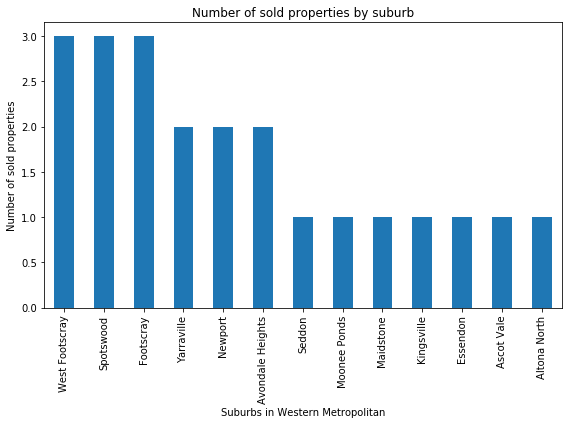

In [253]:
#plotting number of properties by suburb
Bar_plot_data=western.groupby("Suburb")["Address"].count()
bar_plot_data=Bar_plot_data.sort_values(ascending=False)
bar_chart=bar_plot_data.plot(kind="bar" , figsize=(8,6))
bar_chart.set_ylabel("Number of sold properties")
bar_chart.set_xlabel("Suburbs in Western Metropolitan")
bar_chart.set_title("Number of sold properties by suburb")
plt.tight_layout()
plt.savefig("Western.png" , dpi=80)
plt.show()


In [211]:
#Eastern suburbs
eastern=mid_price_h.loc[(mid_price_h["Regionname"]== "Eastern Metropolitan") & \
                         (mid_price_h["Rooms"]==4) &\
                         (mid_price_h["Distance"] <= 10) &(mid_price_h["number of carpark"] >= 1),:]

In [212]:
eastern

,Suburb,Address,Rooms,Type,Price,Method,Real Estate Agent,Date,Distance,Postcode,...,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,Year,Month


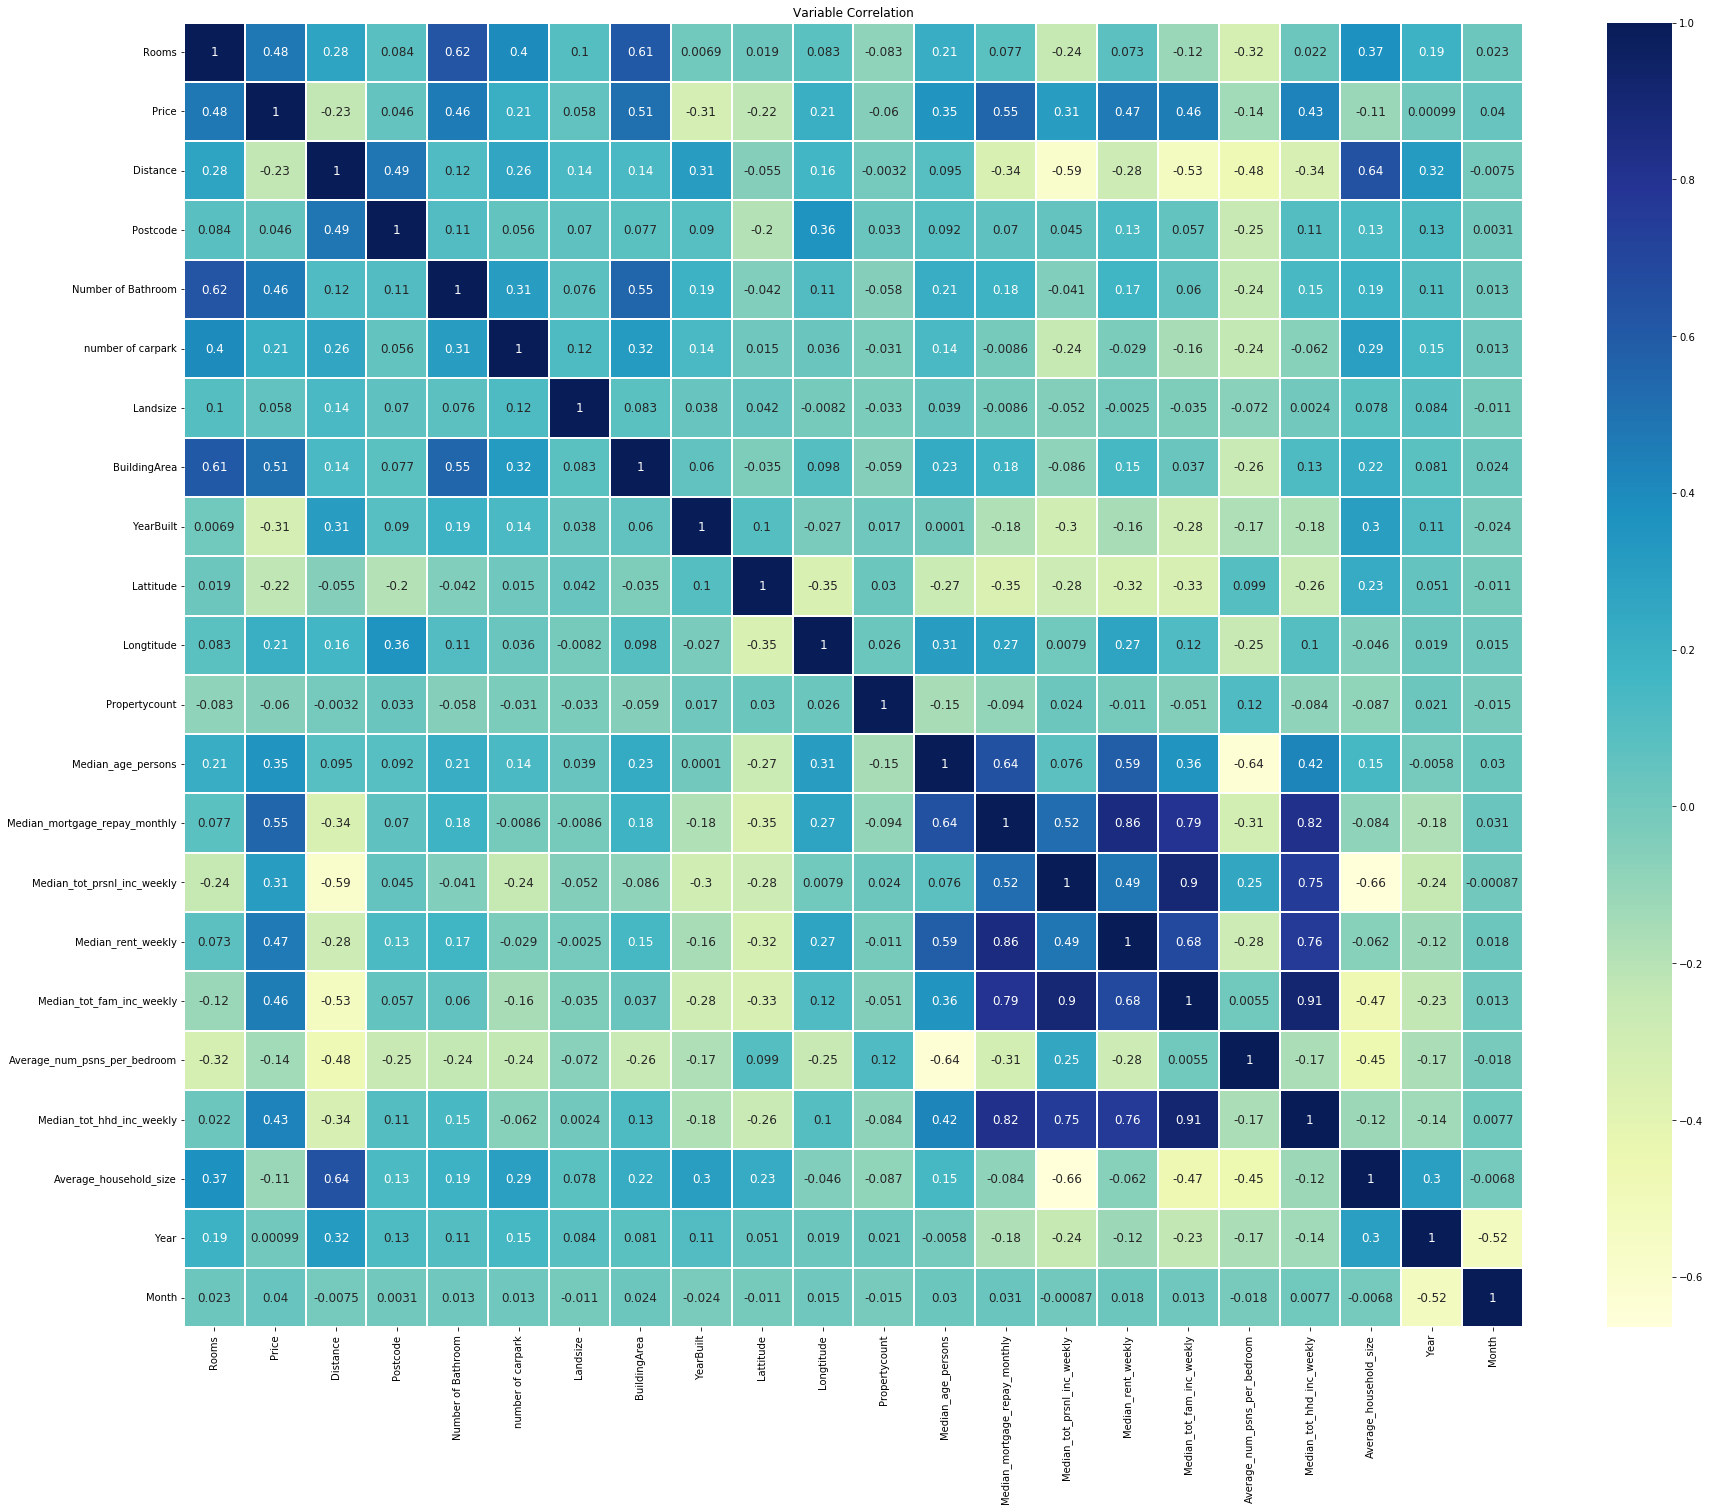

In [254]:
#plot correlation heatmap for all the variation

plt.figure(figsize = (30,24))
sns.heatmap(Main_data.corr(), cmap = 'YlGnBu', linewidth = 1, annot = True, annot_kws = {'size':12})
plt.title('Variable Correlation')
plt.savefig("heatmap.png" , dpi=80)
plt.show()

In [ ]:
# Define a function to measure correlation
def correlation():
    corr=st.pearsonr(x_values, y_values)
    print(f'the correlation between both factor is : {round(corr[0],2)}')

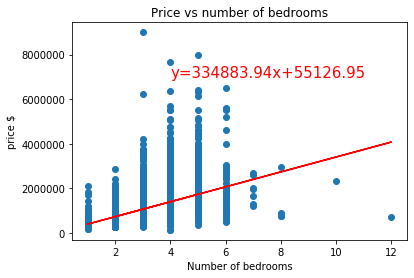

the correlation between both factor is : 0.48


In [255]:
#Scatterplot between price and rooms
x_values=Main_data["Rooms"]
y_values=Main_data["Price"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values=x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")
line_eq="y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))
plt.annotate(line_eq,(4,7000000),fontsize=15,color="red")
plt.xlabel("Number of bedrooms")
plt.ylabel("price $")
plt.title("Price vs number of bedrooms")
plt.savefig("Price_vs_rooms.png" , dpi=80)
plt.show()
correlation()

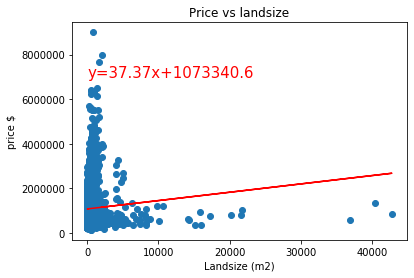

the correlation between both factor is : 0.06


In [256]:
#Scatterplot between price and landsize
x_values=Main_data["Landsize"]
y_values=Main_data["Price"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values=x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")
line_eq="y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))
plt.annotate(line_eq,(4,7000000),fontsize=15,color="red")
plt.xlabel("Landsize (m2)")
plt.ylabel("price $")
plt.title("Price vs landsize")
plt.savefig("Price_vs_landsize.png" , dpi=80)
plt.show()
correlation()

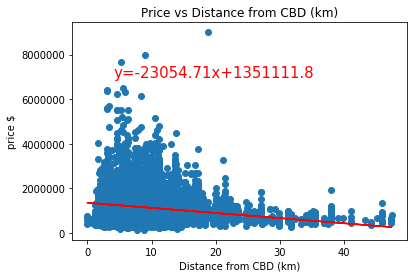

the correlation between both factor is : -0.23


In [257]:
#Scatterplot between price and Distance
x_values=Main_data["Distance"]
y_values=Main_data["Price"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values=x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")
line_eq="y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))
plt.annotate(line_eq,(4,7000000),fontsize=15,color="red")
plt.xlabel("Distance from CBD (km)")
plt.ylabel("price $")
plt.title("Price vs Distance from CBD (km)")
plt.savefig("Price_vs_Distance.png" , dpi=80)
plt.show()
correlation()